<a href="https://colab.research.google.com/github/nAkshat2103/ML-Assignment/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    df = pd.read_csv(url, header=None, names=columns)
    return df

In [3]:
def preprocess_data(df, normalization=False, use_pca=False, n_components=2):
    X = df.iloc[:, :-1].values  # Ensure X is always a NumPy array
    if normalization:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    if use_pca:
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)
    return X

In [4]:
def cluster_and_evaluate(X, method, clusters):
    if method == "kmeans":
        model = KMeans(n_clusters=clusters, random_state=42)
    elif method == "hierarchical":
        model = AgglomerativeClustering(n_clusters=clusters)
    elif method == "meanshift":
        model = MeanShift()
    else:
        raise ValueError("Invalid method")

    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else np.nan
    calinski = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else np.nan
    davies = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.nan
    return labels, silhouette, calinski, davies

In [5]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", s=50)
    plt.title(title)
    plt.show()

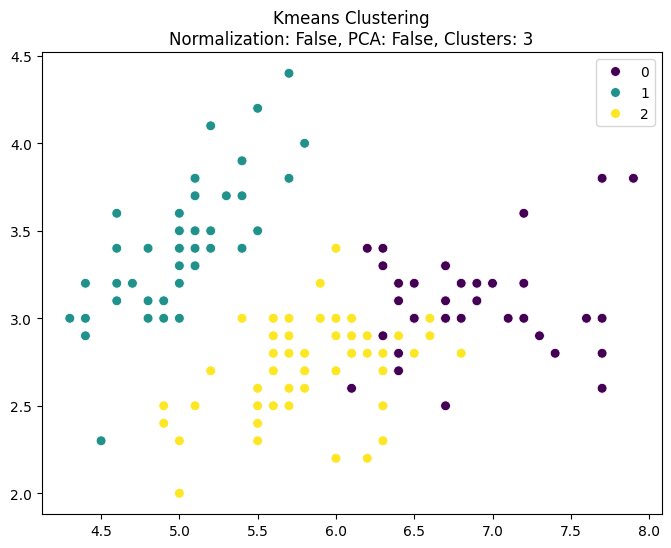

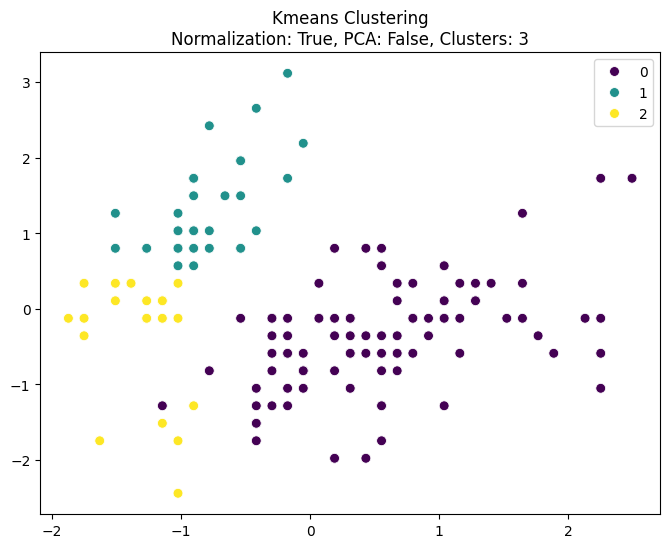

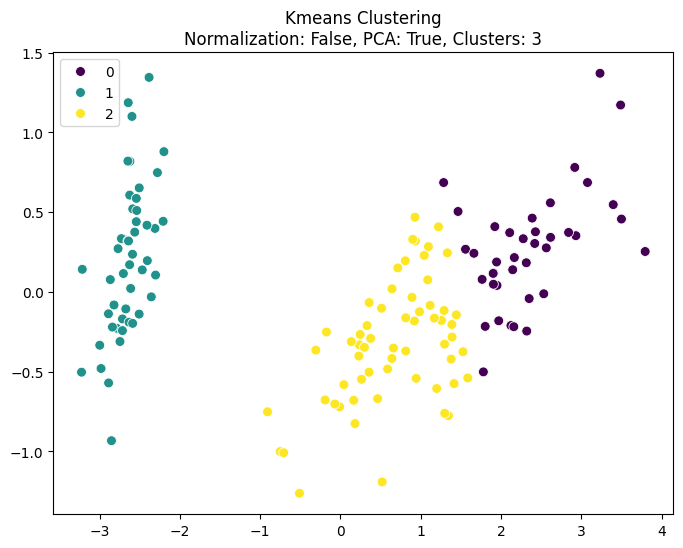

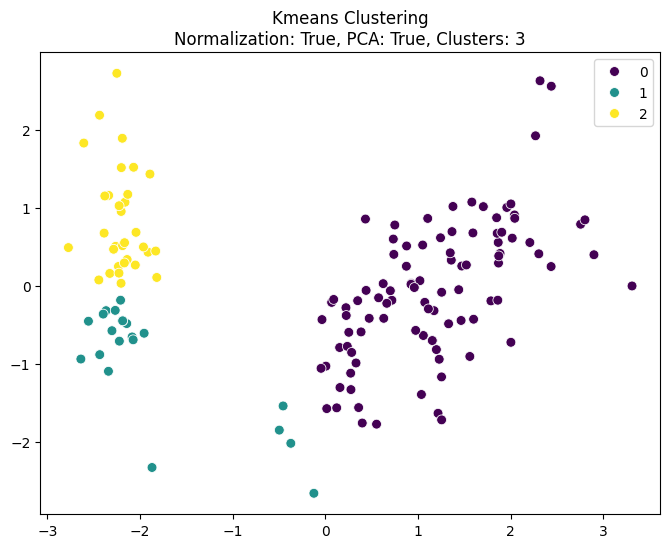

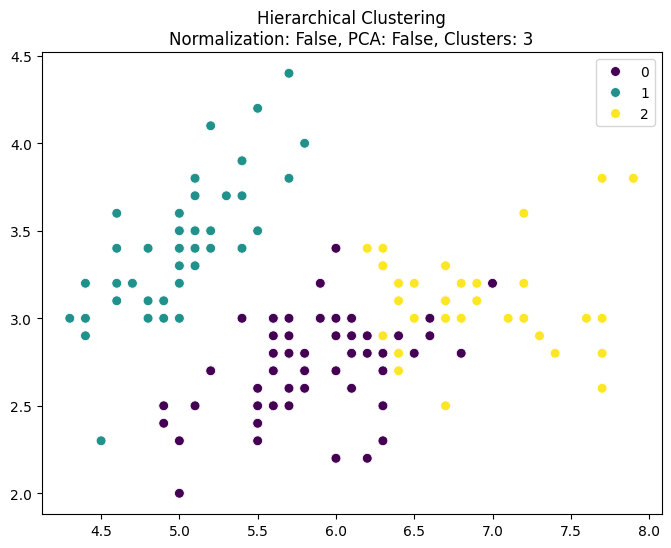

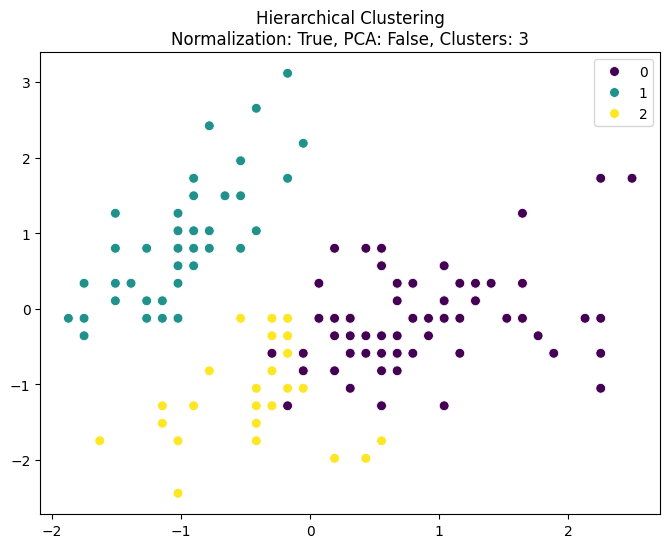

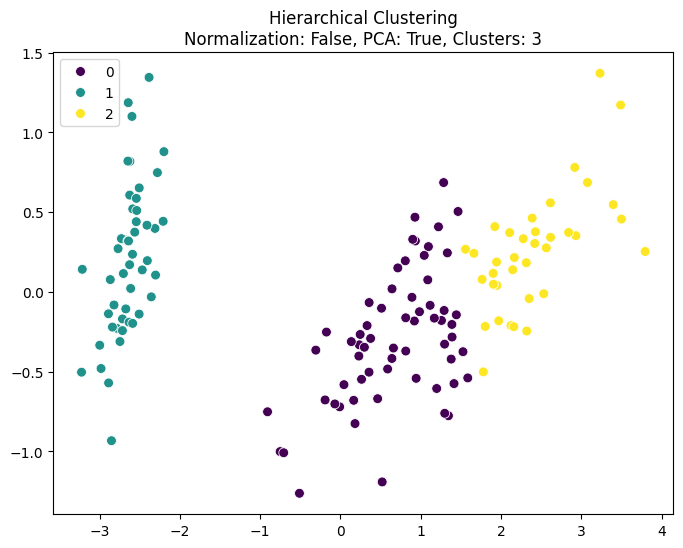

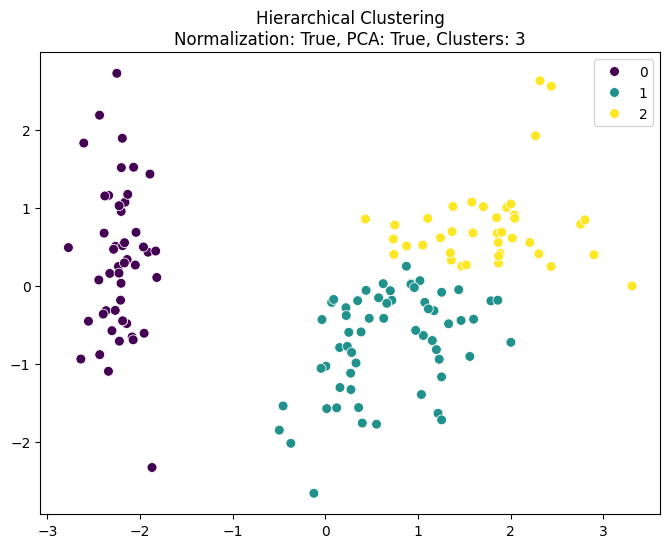

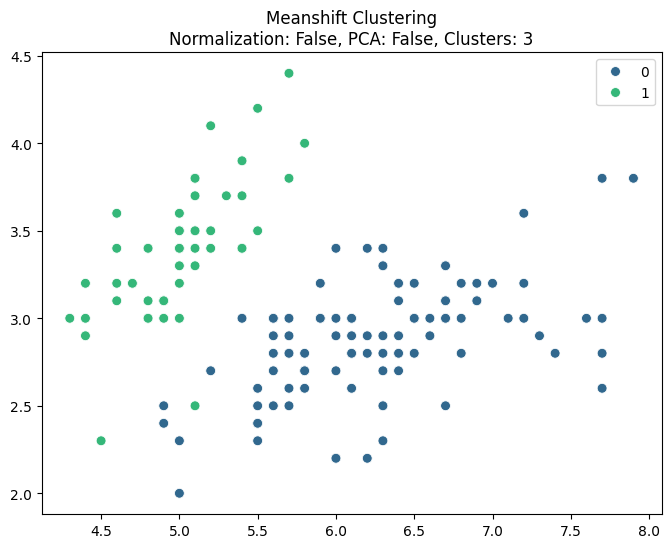

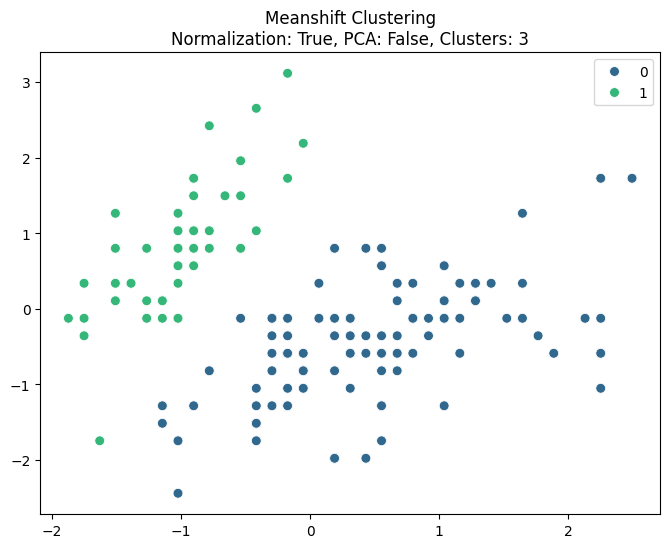

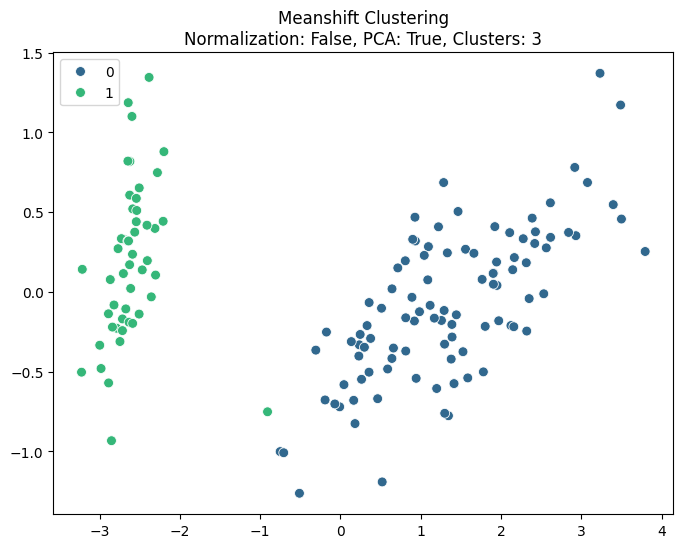

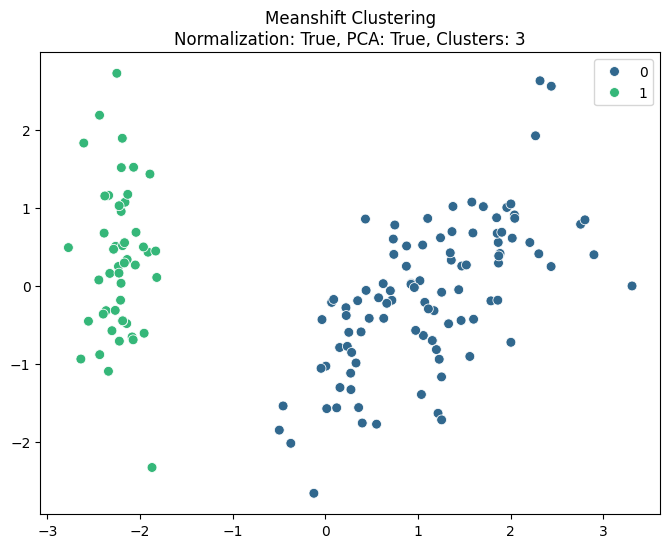

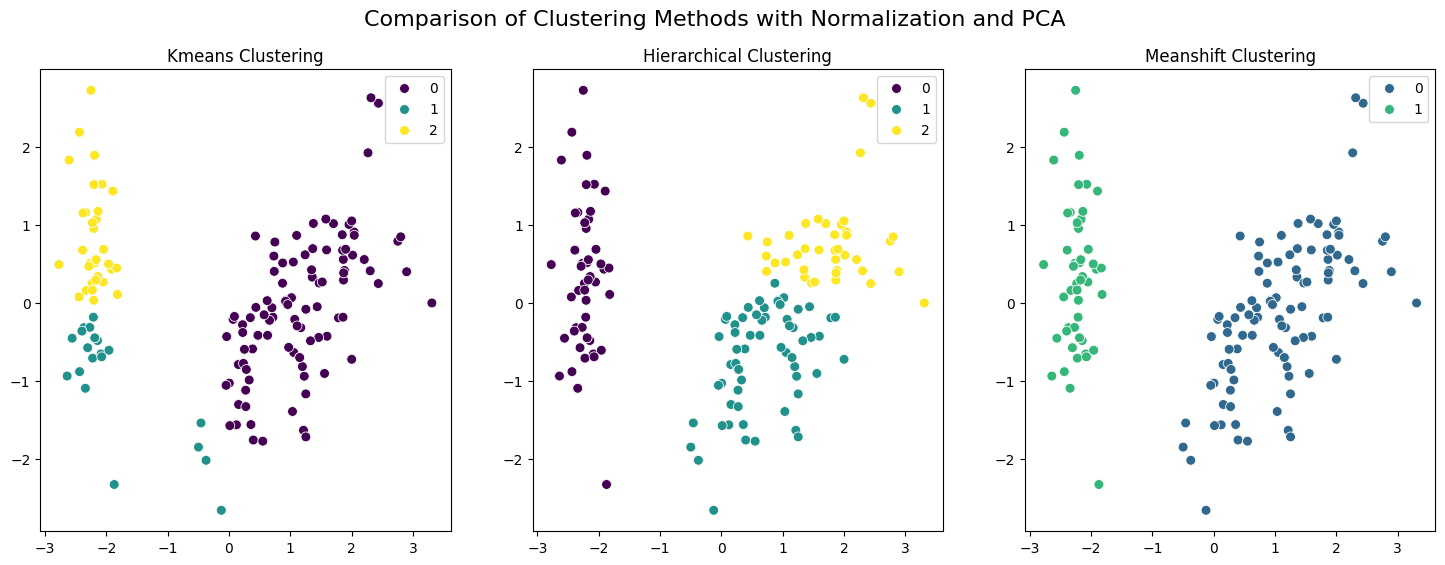

In [7]:
if __name__ == "__main__":
    df = load_dataset()

    methods = ["kmeans", "hierarchical", "meanshift"]
    preprocessing_methods = [(False, False), (True, False), (False, True), (True, True)]
    selected_clusters = 3

    for method in methods:
        for normalize, use_pca in preprocessing_methods:
            X = preprocess_data(df, normalization=normalize, use_pca=use_pca)
            labels, silhouette, calinski, davies = cluster_and_evaluate(X, method, selected_clusters)

            title = f"{method.capitalize()} Clustering\nNormalization: {normalize}, PCA: {use_pca}, Clusters: {selected_clusters}"
            plot_clusters(X, labels, title)

    # Example Combined Results Visualization for K-Means, Hierarchical, and Mean-Shift
    normalization = True
    use_pca = True
    X = preprocess_data(df, normalization=normalization, use_pca=use_pca)

    plt.figure(figsize=(18, 6))
    for i, method in enumerate(methods):
        labels, _, _, _ = cluster_and_evaluate(X, method, selected_clusters)
        plt.subplot(1, 3, i + 1)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", s=50)
        plt.title(f"{method.capitalize()} Clustering")
    plt.suptitle("Comparison of Clustering Methods with Normalization and PCA", fontsize=16)
    plt.show()
